<a href="https://colab.research.google.com/github/arjunjanamatti/small_ML_and_DL_projects/blob/master/premium_payment_default/premium_payment_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# /content/drive/My Drive/Colab Notebooks/train_data.csv
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data.csv')
print('Shape of train_data.csv: ', train_df.shape)
train_df.head()

Shape of train_data.csv:  (79853, 12)


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

* Number of null values in a column, if it has any null values
* format of the result is
  * (column_name, number of null values in column_name)

In [4]:
missing_value_count = train_df.isna().sum()
column_names = list(train_df.columns)
[(column_names[index], value) for index, value in enumerate(missing_value_count) if value>0]

[('Count_3-6_months_late', 97),
 ('Count_6-12_months_late', 97),
 ('Count_more_than_12_months_late', 97),
 ('application_underwriting_score', 2974)]

* Percentage of missing values in each column, when compared to total values

In [5]:
[(column_names[index], round(((value/len(train_df))*100),2)) 
for index, value in enumerate(missing_value_count) if value>0]

[('Count_3-6_months_late', 0.12),
 ('Count_6-12_months_late', 0.12),
 ('Count_more_than_12_months_late', 0.12),
 ('application_underwriting_score', 3.72)]

#### Inference from Data

* Mean age of the applicant is 35.55, and median age of the applicant age is 33
* Number of dependents is around 1 for both mean and median
* Average duration of loan taken is around 21 months, and median for loan duration taken is 18 months.
* Average principal amount of loan is [3,271,258], whereas the median principal amount is [2,319,500], since there is difference in median and mean, with mean higher than median, there are few loans with very high amount which are pushing the average higher than almost 1 million higher than the median value.


In [6]:
train_df.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
perc_premium_paid_by_cash_credit,79853.0,0.314288,0.334915,0.0,0.034,0.167,0.538,1.00
age_in_days,79853.0,18846.696906,5208.719136,7670.0,14974.000,18625.000,22636.000,37602.00
Income,79853.0,208847.171177,496582.597257,24030.0,108010.000,166560.000,252090.000,90262600.00
Count_3-6_months_late,79756.0,0.248671,0.691468,0.0,0.000,0.000,0.000,13.00
Count_6-12_months_late,79756.0,0.078188,0.436507,0.0,0.000,0.000,0.000,17.00
Count_more_than_12_months_late,79756.0,0.060008,0.312023,0.0,0.000,0.000,0.000,11.00
application_underwriting_score,76879.0,99.067291,0.739799,91.9,98.810,99.210,99.540,99.89
no_of_premiums_paid,79853.0,10.863887,5.170687,2.0,7.000,10.000,14.000,60.00
target,79853.0,0.937410,0.242226,0.0,1.000,1.000,1.000,1.00


In [7]:
object_column_names = (train_df.loc[:, train_df.dtypes == np.object]).columns
numeric_column_names = (train_df.loc[:, train_df.dtypes == np.int64]).columns

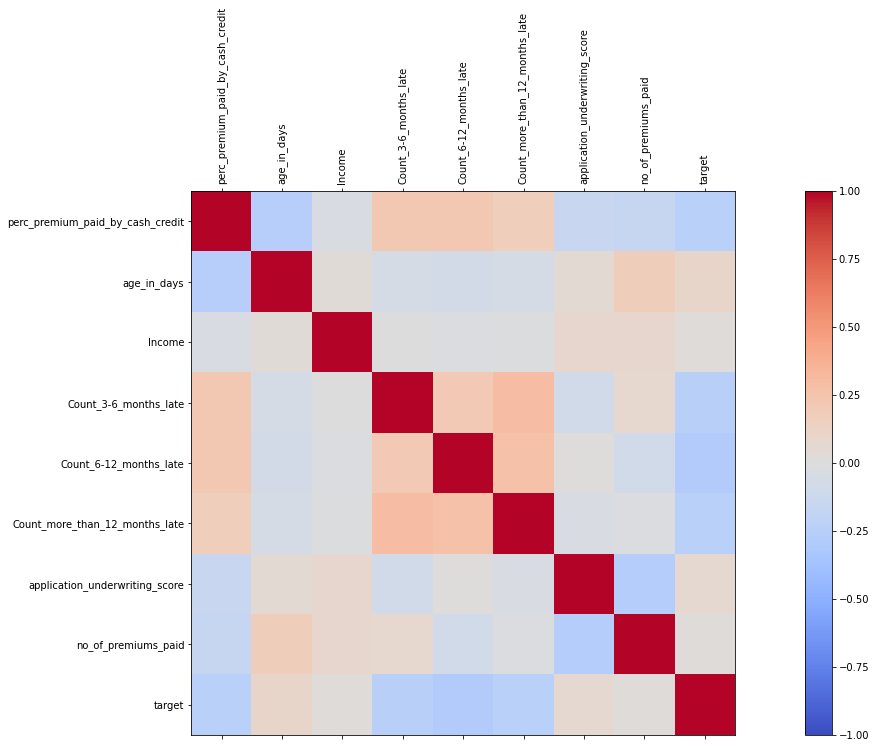

In [8]:
updated_data_1 = train_df.iloc[:,1:].drop(columns = object_column_names)
corr = updated_data_1.corr()

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(updated_data_1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(updated_data_1.columns)
ax.set_yticklabels(updated_data_1.columns)
plt.show()

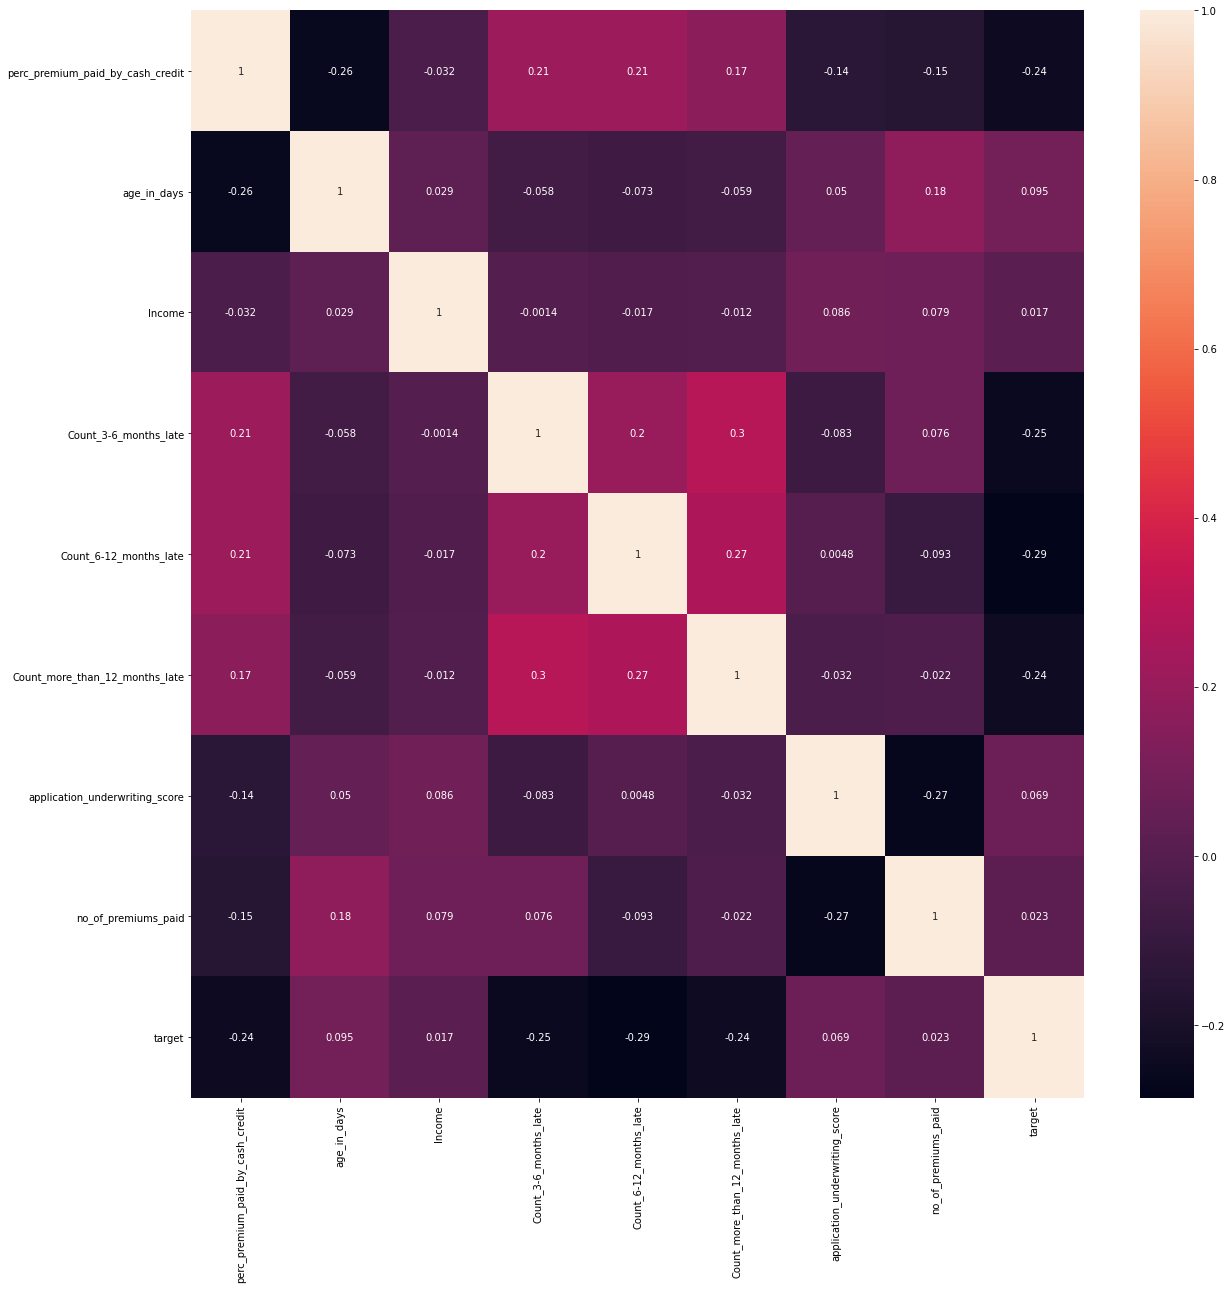

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.iloc[:,1:].corr(), annot=True)
plt.show()

#### Handling missing values

* Since there are only 97 rows which are missing for columns = ['Count_3-6_months_late','Count_6-12_months_late', 'Count_more_than_12_months_late'], in these 97 rows the data is missing for above 3 columns along with 'application_underwriting_score' 

In [10]:
train_df = train_df.dropna(subset = ['Count_3-6_months_late','Count_6-12_months_late', 'Count_more_than_12_months_late'])

In [11]:
listed_columns_mode_fill = list(train_df.columns)
for i in range(len(listed_columns_mode_fill)):
    a = len(train_df[listed_columns_mode_fill[i]].unique())
    print("In column: [{}]".format(listed_columns_mode_fill[i]), " number of unique elements are: ", a )
    train_df[listed_columns_mode_fill[i]].fillna(train_df[listed_columns_mode_fill[i]].mode()[0], inplace=True)
train_df.head()

In column: [id]  number of unique elements are:  79756
In column: [perc_premium_paid_by_cash_credit]  number of unique elements are:  1001
In column: [age_in_days]  number of unique elements are:  833
In column: [Income]  number of unique elements are:  24150
In column: [Count_3-6_months_late]  number of unique elements are:  14
In column: [Count_6-12_months_late]  number of unique elements are:  17
In column: [Count_more_than_12_months_late]  number of unique elements are:  10
In column: [application_underwriting_score]  number of unique elements are:  673
In column: [no_of_premiums_paid]  number of unique elements are:  57
In column: [sourcing_channel]  number of unique elements are:  5
In column: [residence_area_type]  number of unique elements are:  2
In column: [target]  number of unique elements are:  2


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79756 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79756 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79756 non-null  float64
 2   age_in_days                       79756 non-null  int64  
 3   Income                            79756 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    79756 non-null  float64
 8   no_of_premiums_paid               79756 non-null  int64  
 9   sourcing_channel                  79756 non-null  object 
 10  residence_area_type               79756 non-null  object 
 11  target                            79756 non-null  int64  
dtypes: f

#### Handling categorical columns

In [13]:
object_column_names = (train_df.loc[:, train_df.dtypes == np.object]).columns
train_df[object_column_names].head()

,sourcing_channel,residence_area_type
0,C,Urban
1,A,Urban
2,C,Rural
3,A,Urban
4,B,Urban


In [14]:
for i in object_column_names:
  labelencoder = LabelEncoder()
  train_df[i] = labelencoder.fit_transform(train_df[i])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79756 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79756 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79756 non-null  float64
 2   age_in_days                       79756 non-null  int64  
 3   Income                            79756 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    79756 non-null  float64
 8   no_of_premiums_paid               79756 non-null  int64  
 9   sourcing_channel                  79756 non-null  int64  
 10  residence_area_type               79756 non-null  int64  
 11  target                            79756 non-null  int64  
dtypes: f

#### Handling imbalance dataset

In [15]:
(train_df.groupby('target').size())

target
0     4938
1    74818
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


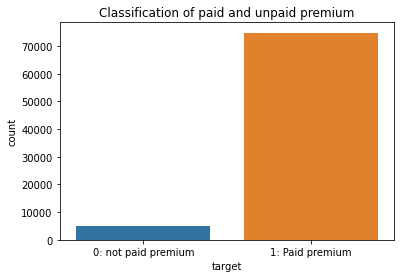

In [16]:
import seaborn as sns
sns.countplot(train_df['target'],label="Count")
plt.title('Classification of paid and unpaid premium')
plt.xticks([0,1], ['0: not paid premium','1: Paid premium'])
plt.show()

##### Handling imbalance with imblearn library

In [17]:
import imblearn
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
X = train_df.iloc[:,1:-1]
y = train_df.iloc[:,-1]

* Tomek links are pairs of very close instances of paid and unpaid applicants, this will try to remove all the instances which are close to each other, hence the remaining data will be further apart, and this will be helpful in the classification process.

In [19]:
tome_links = TomekLinks(sampling_strategy = 'majority')

x_tome_links, y_tome_links = tome_links.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tome_links))

Original dataset shape Counter({1: 74818, 0: 4938})
Resample dataset shape Counter({1: 72068, 0: 4938})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Synthetic Minority Oversampling Technique (SMOTE)

SMOTE algorithm works in 4 simple steps:

* It selects the minority class, which is premium paid applicant in our case
* It finds its k nearest neighbors, and places a synthetic point on the line jointing the point under consideration and its chose neighbor.
* This process is repeated till the premium paid applicant class is equal to premium UN-paid applicant.

In [20]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape Counter({1: 74818, 0: 4938})
Resample dataset shape Counter({1: 74818, 0: 74818})


NearMiss is a technique which focusses on reducing the majority class, which is premium paid applicant in our case, and the end result will have premium un-paid applicants equal to premium paid applicant

In [21]:
near_miss = NearMiss()
x_near_miss, y_near_miss = near_miss.fit_resample(X, y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_near_miss))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape Counter({1: 74818, 0: 4938})
Resample dataset shape Counter({0: 4938, 1: 4938})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Machine Learning Algorithm

In [22]:
file_location = '/content/drive/My Drive/Colab Notebooks/test.csv'
def get_test_data(file_location):
  #load the dataframe
  test_df = pd.read_csv(file_location)
  print('Shape of test_df.csv: ', test_df.shape)
  # check for missing values
  missing_value_count = test_df.isna().sum()
  column_names = list(test_df.columns)
  print([(column_names[index], value) for index, value in enumerate(missing_value_count) if value>0])

  # handle missing values
  test_df = test_df.dropna(subset = ['Count_3-6_months_late','Count_6-12_months_late', 'Count_more_than_12_months_late'])
  listed_columns_mode_fill = list(test_df.columns)
  for i in range(len(listed_columns_mode_fill)):
      a = len(test_df[listed_columns_mode_fill[i]].unique())
      print("In column: [{}]".format(listed_columns_mode_fill[i]), " number of unique elements are: ", a )
      test_df[listed_columns_mode_fill[i]].fillna(test_df[listed_columns_mode_fill[i]].mode()[0], inplace=True)

  # handle categorical columns
  object_column_names = (test_df.loc[:, test_df.dtypes == np.object]).columns
  for i in object_column_names:
    labelencoder = LabelEncoder()
    test_df[i] = labelencoder.fit_transform(test_df[i])
  return test_df

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, roc_auc_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
def model_result(X_train, X_test, y_train, y_test, model):
  model_1 = model
  model_1.fit(X_train, y_train)
  print('Accuracy: {}%'.format(round(accuracy_score(model_1.predict(X_test), y_test) * 100),2))
  print('ROCAUC score:{}%'.format(round(roc_auc_score(y_test, model_1.predict(X_test))*100, 2)))
  print('F1 score: {}% '.format(round(f1_score(y_test, model_1.predict(X_test))*100,2)))
  return float(round(roc_auc_score(y_test, model_1.predict(X_test))*100, 2))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_near_miss, X_test_near_miss, y_train_near_miss, y_test_near_miss = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
X_train_tome_links, X_test_tome_links, y_train_tome_links, y_test_tome_links = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [25]:
logistic_results = []
print('Results of imbbalanced dataset: ')
logistic_results.append(model_result(X_train, X_test, y_train, y_test, model = LogisticRegression()))
print()
print('Results of nearMiss balancing: ')
logistic_results.append(model_result(X_train_near_miss, X_test_near_miss, y_train_near_miss, y_test_near_miss, model = LogisticRegression()))
print()
print('Results of TomeLinks balancing: ')
logistic_results.append(model_result(X_train_tome_links, X_test_tome_links, y_train_tome_links, y_test_tome_links, model = LogisticRegression()))
print()
print('Results of SMOTE balancing: ')
logistic_results.append(model_result(X_train_smote, X_test_smote, y_train_smote, y_test_smote, model = LogisticRegression()))

Results of imbbalanced dataset: 
Accuracy: 94.0%
ROCAUC score:50.0%
F1 score: 96.8% 

Results of nearMiss balancing: 
Accuracy: 57.0%
ROCAUC score:56.87%
F1 score: 57.34% 

Results of TomeLinks balancing: 
Accuracy: 94.0%
ROCAUC score:50.0%
F1 score: 96.67% 

Results of SMOTE balancing: 
Accuracy: 58.0%
ROCAUC score:58.16%
F1 score: 57.91% 


In [26]:
from xgboost import XGBClassifier

In [27]:
xgb_classifier_results = []
print('Results of imbbalanced dataset: ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_classifier_results.append(model_result(X_train, X_test, y_train, y_test, model = XGBClassifier()))
print()
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
xgb_classifier_results.append(model_result(X_train, X_test, y_train, y_test, model = XGBClassifier()))
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
xgb_classifier_results.append(model_result(X_train, X_test, y_train, y_test, model = XGBClassifier()))
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
xgb_classifier_results.append(model_result(X_train, X_test, y_train, y_test, model = XGBClassifier()))

Results of imbbalanced dataset: 
Accuracy: 94.0%
ROCAUC score:57.1%
F1 score: 96.94% 

Results of nearMiss balancing: 
Accuracy: 83.0%
ROCAUC score:82.76%
F1 score: 82.94% 

Results of TomeLinks balancing: 
Accuracy: 94.0%
ROCAUC score:56.89%
F1 score: 96.78% 

Results of SMOTE balancing: 
Accuracy: 95.0%
ROCAUC score:95.17%
F1 score: 95.24% 


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
random_forrest_results = []
print('Results of imbbalanced dataset: ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forrest_results.append(model_result(X_train, X_test, y_train, y_test, model = RandomForestClassifier()))
print()
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
random_forrest_results.append(model_result(X_train, X_test, y_train, y_test, model = RandomForestClassifier()))
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
random_forrest_results.append(model_result(X_train, X_test, y_train, y_test, model = RandomForestClassifier()))
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
random_forrest_results.append(model_result(X_train, X_test, y_train, y_test, model = RandomForestClassifier()))

Results of imbbalanced dataset: 
Accuracy: 94.0%
ROCAUC score:56.26%
F1 score: 96.8% 

Results of nearMiss balancing: 
Accuracy: 80.0%
ROCAUC score:79.87%
F1 score: 79.76% 

Results of TomeLinks balancing: 
Accuracy: 94.0%
ROCAUC score:56.78%
F1 score: 96.67% 

Results of SMOTE balancing: 
Accuracy: 96.0%
ROCAUC score:96.26%
F1 score: 96.27% 


In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn_neighbors_results = []
print('Results of imbbalanced dataset: ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_neighbors_results.append(model_result(X_train, X_test, y_train, y_test, model = KNeighborsClassifier()))
print()
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
knn_neighbors_results.append(model_result(X_train, X_test, y_train, y_test, model = KNeighborsClassifier()))
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
knn_neighbors_results.append(model_result(X_train, X_test, y_train, y_test, model = KNeighborsClassifier()))
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
knn_neighbors_results.append(model_result(X_train, X_test, y_train, y_test, model = KNeighborsClassifier()))

Results of imbbalanced dataset: 
Accuracy: 93.0%
ROCAUC score:50.25%
F1 score: 96.62% 

Results of nearMiss balancing: 
Accuracy: 81.0%
ROCAUC score:81.25%
F1 score: 82.71% 

Results of TomeLinks balancing: 
Accuracy: 93.0%
ROCAUC score:50.23%
F1 score: 96.47% 

Results of SMOTE balancing: 
Accuracy: 80.0%
ROCAUC score:79.46%
F1 score: 78.49% 


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
decision_tree_results = []
print('Results of imbbalanced dataset: ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree_results.append(model_result(X_train, X_test, y_train, y_test, model = DecisionTreeClassifier()))
print()
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
decision_tree_results.append(model_result(X_train, X_test, y_train, y_test, model = DecisionTreeClassifier()))
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
decision_tree_results.append(model_result(X_train, X_test, y_train, y_test, model = DecisionTreeClassifier()))
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
decision_tree_results.append(model_result(X_train, X_test, y_train, y_test, model = DecisionTreeClassifier()))

Results of imbbalanced dataset: 
Accuracy: 89.0%
ROCAUC score:58.76%
F1 score: 94.33% 

Results of nearMiss balancing: 
Accuracy: 74.0%
ROCAUC score:74.39%
F1 score: 74.22% 

Results of TomeLinks balancing: 
Accuracy: 89.0%
ROCAUC score:59.96%
F1 score: 94.25% 

Results of SMOTE balancing: 
Accuracy: 94.0%
ROCAUC score:93.5%
F1 score: 93.4% 


In [34]:
classification_results = pd.DataFrame()
classification_results['Logistic Regression'] = pd.Series(data = logistic_results)
classification_results['XGB Classifer'] = pd.Series(data = xgb_classifier_results)
classification_results['RandomForestClassifier'] = pd.Series(data = random_forrest_results)
classification_results['KNeighborsClassifier'] = pd.Series(data = knn_neighbors_results)
classification_results['DecisionTreeClassifier'] = pd.Series(data = decision_tree_results)
classification_results.index = ['imbalanced_dataset', 'near_miss balanced dataset', 'tome_links balanced dataset', 'SMOTE']
classification_results

,Logistic Regression,XGB Classifer,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier
imbalanced_dataset,50.00,57.10,56.26,50.25,58.76
near_miss balanced dataset,56.87,82.76,79.87,81.25,74.39
tome_links balanced dataset,50.00,56.89,56.78,50.23,59.96
SMOTE,58.16,95.17,96.26,79.46,93.50


* DecisionTreeClassifier with SMOTE balanced data is used for prediction

In [35]:
best_model = DecisionTreeClassifier()
best_model.fit(x_smote, y_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
df = get_test_data(file_location)
X_test = df.iloc[:,1:]

Shape of test_df.csv:  (34224, 11)
[('Count_3-6_months_late', 31), ('Count_6-12_months_late', 31), ('Count_more_than_12_months_late', 31), ('application_underwriting_score', 1323)]
In column: [id]  number of unique elements are:  34193
In column: [perc_premium_paid_by_cash_credit]  number of unique elements are:  1001
In column: [age_in_days]  number of unique elements are:  809
In column: [Income]  number of unique elements are:  14395
In column: [Count_3-6_months_late]  number of unique elements are:  12
In column: [Count_6-12_months_late]  number of unique elements are:  11
In column: [Count_more_than_12_months_late]  number of unique elements are:  8
In column: [application_underwriting_score]  number of unique elements are:  565
In column: [no_of_premiums_paid]  number of unique elements are:  52
In column: [sourcing_channel]  number of unique elements are:  5
In column: [residence_area_type]  number of unique elements are:  2


In [38]:
df['target'] = best_model.predict(X_test)
df

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,0,0,1
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,0,1,1
2,70762,1.000,17170,186030,0.0,0.0,0.0,99.89,2,1,1,1
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,1,0,1
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34219,81988,0.227,20810,110240,0.0,0.0,0.0,97.52,9,0,1,1
34220,30326,0.157,19353,125090,0.0,0.0,0.0,99.62,7,0,0,1
34221,65749,0.325,18264,196570,0.0,0.0,0.0,98.58,14,1,0,1
34222,65686,0.983,16798,212150,1.0,0.0,1.0,98.88,10,0,1,1
